In [3]:
import torch as pt
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

from mdfloss import MDFLoss

In [4]:
# Set parameters
cuda_available = False
epochs = 25
application = 'JPEG'
image_path = './misc/i10.png'

if application =='SISR':
    path_disc = "./weights/Ds_SISR.pth"
elif application == 'Denoising':
    path_disc = "./weights/Ds_Denoising.pth"
elif application == 'JPEG':
    path_disc = "./weights/Ds_JPEG.pth"

# Read reference images
imgr = imageio.imread(image_path)
imgr = pt.from_numpy(imageio.core.asarray(imgr/255.0))
imgr = imgr.type(dtype=pt.float64)
imgr = imgr.permute(2,0,1)
imgr = imgr.unsqueeze(0).type(pt.FloatTensor)

# Create a noisy image 
imgd = pt.rand(imgr.size())

# Save the original state
imgdo = imgd.detach().clone()

if cuda_available:
    imgr = imgr.cuda()
    imgd = imgd.cuda()

# Convert images to variables to support gradients
imgrb = Variable( imgr, requires_grad = False)
imgdb = Variable( imgd, requires_grad = True)

optimizer = optim.Adam([imgdb], lr=0.1)

# Initialise the loss
criterion = MDFLoss(path_disc, cuda_available=cuda_available)

# Iterate over the epochs optimizing for the noisy image
for ii in range(0,epochs):
    
    optimizer.zero_grad()
    loss = criterion(imgrb,imgdb) 
    print("Epoch: ",ii," loss: ", loss.item())
    loss.backward()
    optimizer.step()
 
    

Epoch:  0  loss:  16.722064971923828
Epoch:  1  loss:  9.6588716506958
Epoch:  2  loss:  6.547252655029297
Epoch:  3  loss:  5.319980144500732
Epoch:  4  loss:  4.751269340515137
Epoch:  5  loss:  4.319289207458496
Epoch:  6  loss:  3.884593963623047
Epoch:  7  loss:  3.4364492893218994
Epoch:  8  loss:  3.0028443336486816
Epoch:  9  loss:  2.6061885356903076
Epoch:  10  loss:  2.2620670795440674
Epoch:  11  loss:  1.9774078130722046
Epoch:  12  loss:  1.750380277633667
Epoch:  13  loss:  1.5681101083755493
Epoch:  14  loss:  1.4177656173706055
Epoch:  15  loss:  1.2917026281356812
Epoch:  16  loss:  1.1820080280303955
Epoch:  17  loss:  1.0824459791183472
Epoch:  18  loss:  0.9898398518562317
Epoch:  19  loss:  0.9045855402946472
Epoch:  20  loss:  0.8270361423492432
Epoch:  21  loss:  0.7563018798828125
Epoch:  22  loss:  0.6903709173202515
Epoch:  23  loss:  0.6291210651397705
Epoch:  24  loss:  0.5725780725479126


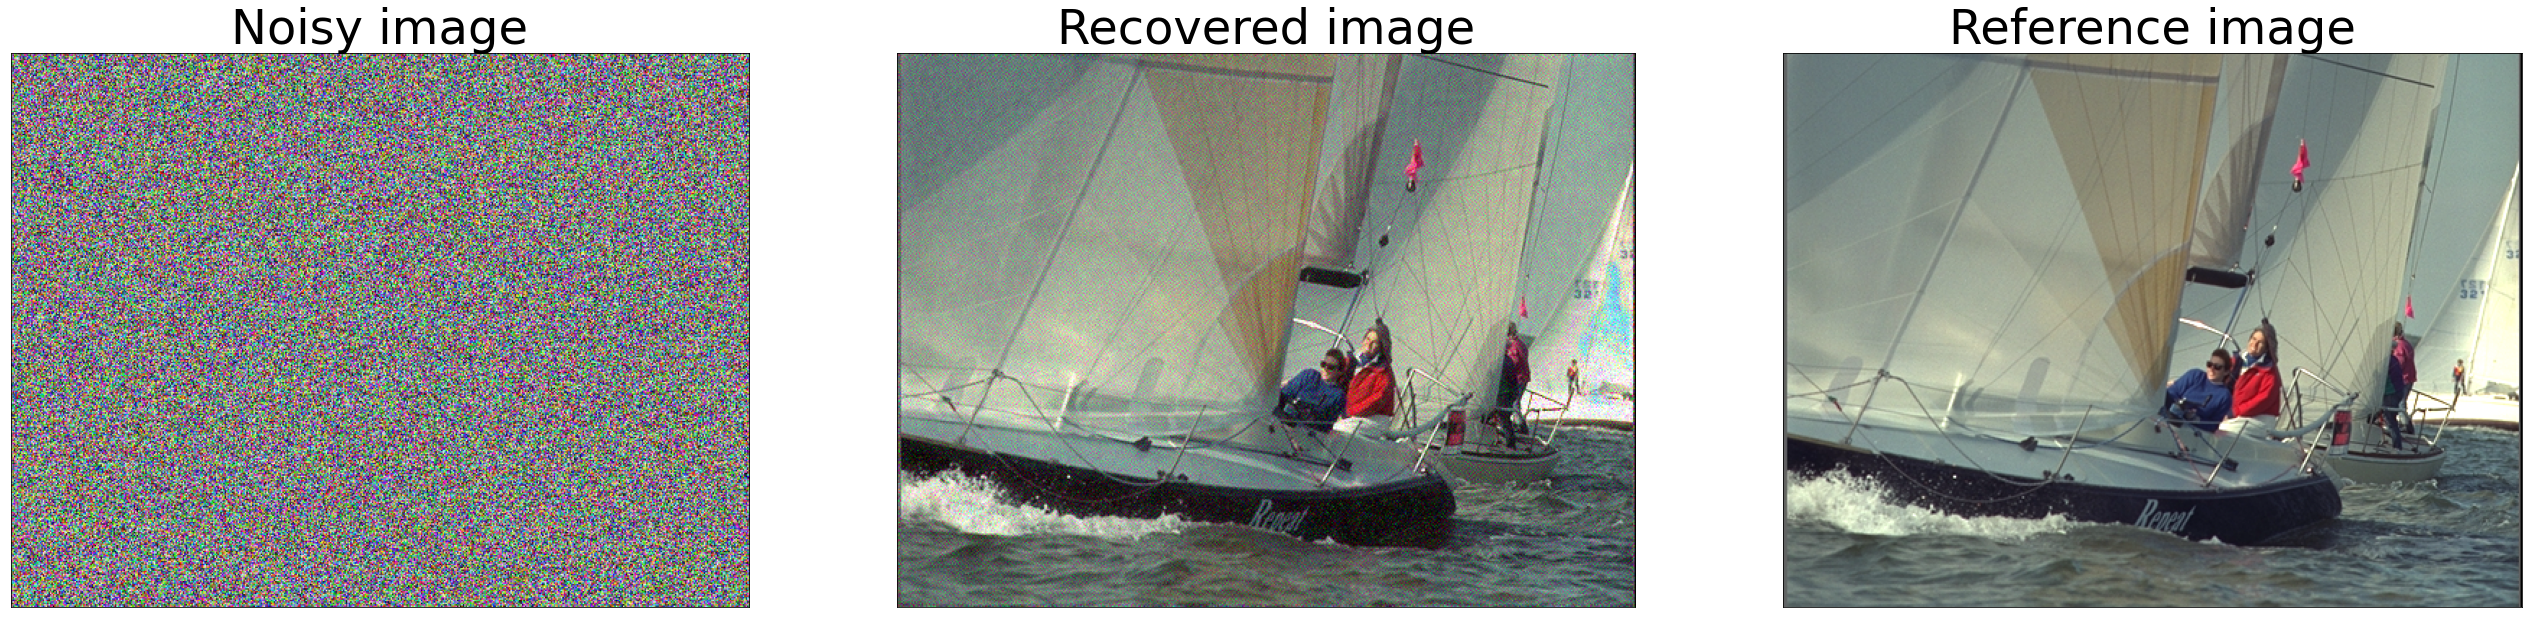

In [5]:
# Convert images to numpy
imgrnp = imgr.cpu().squeeze(0).permute(1,2,0).data.numpy()
imgdnp = imgd.cpu().squeeze(0).permute(1,2,0).data.numpy()
imgdonp = imgdo.cpu().squeeze(0).permute(1,2,0).data.numpy()


# Plot optimization results
fig, axs = plt.subplots(1, 3,figsize=(45,15))


axs[0].imshow(imgdonp)
axs[0].set_title('Noisy image',fontsize=48)
axs[1].imshow(imgdnp)
axs[1].set_title('Recovered image',fontsize=48)
axs[2].imshow(imgrnp)
axs[2].set_title('Reference image',fontsize=48)

# Remove the ticks from the axis
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])